# Summary:
---

1. This notebook is a workspace for general scratchwork

### Read Files

In [1]:
import pandas as pd
from Bio import SeqIO

In [2]:
# parse attempt 2 from dataParsing notebook
def parseFasta(data):
    d = {fasta.id : str(fasta.seq) for fasta in SeqIO.parse(data, "fasta")}
    pd.DataFrame([d])

    s = pd.Series(d, name='Sequence')
    s.index.name = 'ID'
    s.reset_index()
    return pd.DataFrame(s)

In [3]:
virus1 = parseFasta("data/Sclerotinia_biocontrol_mycovirus_nucleotide.fasta")
virus1

,Sequence
ID,
NC_007415.1,CTTTAGTAAATACCACCGCCTCTTAATAAGTCTCGAGGCACTCCCC...
NC_015939.1,GGGGTGATGGGAAACTTACGTTTCGCCAACGTTAAGGTACTGTGAT...
NC_022896.1,TTTTTGGGGATGGTACTCTCAGGTTTGATCTTTGTAGATCCTAACT...
NC_026510.1,TTGGCTCCTGGAGACCGTTAGGTCCCCAGAAGCGGTTCAATAGAAC...
NC_027138.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...
NC_027139.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...
NC_025383.1,AGGGAGTATTATAATTACCTTCGTAGTTGTTCTTACTCTCTGGTAC...


In [4]:
virus01 = parseFasta("data/mycovirus_genbank_all_refseq_nucleotide_unique.fasta")

In [5]:
# put confirmed virus killers at bottom, and removed the duplicates already in the data
virus01 = virus01.append(virus1)
virus01 = virus01.drop_duplicates(keep="last")
virus01

,Sequence
ID,
NC_000960.1,GGGGGTTAGAGAAATCTTGGGAGATTTCTATCGTCATAGACATATG...
NC_001278.1,GGGAAATTTGTGAGATTATCGCCCTAAAGGATAACTCTCATGCGGG...
NC_001492.1,GCCTATGGGTGGTCTACATAGGTGAGCATGCGTTGCTCGATATAGA...
NC_001633.1,ACAAAATAATTGAAGAAATTATTTTTGTTTTACATATTTAGATCTT...
NC_001641.1,GAATTTTTCGGTGAACCGGAATTATGTCGTCTCTGTTAAATTCATT...
...,...
NC_022896.1,TTTTTGGGGATGGTACTCTCAGGTTTGATCTTTGTAGATCCTAACT...
NC_026510.1,TTGGCTCCTGGAGACCGTTAGGTCCCCAGAAGCGGTTCAATAGAAC...
NC_027138.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...


### Make KMER Table

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# testing
tfid_vector = TfidfVectorizer(analyzer='char', ngram_range=(1,2))
s_hat = tfid_vector.fit_transform(virus1.Sequence)
kmers = s_hat.toarray()
kmerNames = tfid_vector.get_feature_names()

In [8]:
# kmer table with kmers of length a to b
def kmerXTable(s, a, b):
    tfid_vector = TfidfVectorizer(analyzer='char', ngram_range=(a,b))
    s_hat = tfid_vector.fit_transform(s.Sequence)
    kmerNames = tfid_vector.get_feature_names()
    kmers = s_hat.toarray()
    return pd.DataFrame(kmers,columns=kmerNames, index = s.index)

In [9]:
kmer7Table1 = kmerXTable(virus1, 7,7)
kmer7Table1

,aaaaaaa,aaaaaac,aaaaaag,aaaaaat,aaaaaca,aaaaacc,aaaaacg,aaaaact,aaaaaga,aaaaagc,...,tttttck,tttttct,tttttga,tttttgc,tttttgg,tttttgt,tttttta,ttttttc,ttttttg,ttttttt
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.413798,0.000000,0.00000,0.000000,0.000000,0.009196,0.012391,0.018391,0.000000,0.000000,...,0.000000,0.000000,0.018391,0.024782,0.000000,0.009196,0.000000,0.009196,0.024782,0.021183
NC_015939.1,0.219900,0.008231,0.00000,0.014071,0.005351,0.000000,0.000000,0.012217,0.006108,0.000000,...,0.000000,0.008231,0.000000,0.000000,0.012217,0.012217,0.007036,0.000000,0.000000,0.000000
NC_022896.1,0.120535,0.000000,0.00000,0.000000,0.000000,0.009643,0.006497,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014464,0.009643,0.005553,0.000000,0.006497,0.000000
NC_026510.1,0.000000,0.000000,0.00000,0.000000,0.014261,0.000000,0.000000,0.000000,0.016280,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC_027138.1,0.000000,0.000000,0.00000,0.000000,0.007853,0.008964,0.000000,0.008964,0.000000,0.012080,...,0.000000,0.000000,0.008964,0.012080,0.000000,0.000000,0.000000,0.008964,0.000000,0.000000
NC_027139.1,0.000000,0.000000,0.01534,0.010884,0.008278,0.018900,0.000000,0.000000,0.018900,0.012734,...,0.000000,0.000000,0.009450,0.000000,0.009450,0.000000,0.000000,0.009450,0.000000,0.010884
NC_025383.1,0.006236,0.008403,0.00000,0.028731,0.021851,0.000000,0.000000,0.012472,0.018708,0.000000,...,0.010123,0.008403,0.012472,0.000000,0.006236,0.012472,0.014365,0.012472,0.000000,0.007183


In [10]:
kmer27Table1 = kmerXTable(virus1, 2,7)

In [11]:
kmer7Table01 = kmerXTable(virus01, 7,7)

In [12]:
kmer27Table01 = kmerXTable(virus01, 2,7)

### Find importance of KMERs

In [13]:
# all columns that contain zeros for virus1
kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) == True]

,aaaaaaa,aaaaaac,aaaaaag,aaaaaat,aaaaaca,aaaaacc,aaaaacg,aaaaact,aaaaaga,aaaaagc,...,tttttck,tttttct,tttttga,tttttgc,tttttgg,tttttgt,tttttta,ttttttc,ttttttg,ttttttt
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.413798,0.000000,0.00000,0.000000,0.000000,0.009196,0.012391,0.018391,0.000000,0.000000,...,0.000000,0.000000,0.018391,0.024782,0.000000,0.009196,0.000000,0.009196,0.024782,0.021183
NC_015939.1,0.219900,0.008231,0.00000,0.014071,0.005351,0.000000,0.000000,0.012217,0.006108,0.000000,...,0.000000,0.008231,0.000000,0.000000,0.012217,0.012217,0.007036,0.000000,0.000000,0.000000
NC_022896.1,0.120535,0.000000,0.00000,0.000000,0.000000,0.009643,0.006497,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014464,0.009643,0.005553,0.000000,0.006497,0.000000
NC_026510.1,0.000000,0.000000,0.00000,0.000000,0.014261,0.000000,0.000000,0.000000,0.016280,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC_027138.1,0.000000,0.000000,0.00000,0.000000,0.007853,0.008964,0.000000,0.008964,0.000000,0.012080,...,0.000000,0.000000,0.008964,0.012080,0.000000,0.000000,0.000000,0.008964,0.000000,0.000000
NC_027139.1,0.000000,0.000000,0.01534,0.010884,0.008278,0.018900,0.000000,0.000000,0.018900,0.012734,...,0.000000,0.000000,0.009450,0.000000,0.009450,0.000000,0.000000,0.009450,0.000000,0.010884
NC_025383.1,0.006236,0.008403,0.00000,0.028731,0.021851,0.000000,0.000000,0.012472,0.018708,0.000000,...,0.010123,0.008403,0.012472,0.000000,0.006236,0.012472,0.014365,0.012472,0.000000,0.007183


In [14]:
# all columns that do not contain any zeros for virus1
kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True]

,aaaacaa,aactttt,aagatga,aatcaaa,acaaata,agaagaa,agatttc,aggaatt,aggagat,aggttga,...,tcaagga,tcacaag,tcttgga,tggaaag,tggaatt,ttcaaag,ttctttc,ttgaaga,ttggaaa,ttttgat
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.012511,0.006255,0.018766,0.012511,0.006255,0.006255,0.006255,0.006255,0.006255,0.006255,...,0.012511,0.012511,0.006255,0.012511,0.006255,0.006255,0.006255,0.012511,0.012511,0.018766
NC_015939.1,0.008311,0.004155,0.008311,0.012466,0.004155,0.024932,0.004155,0.008311,0.008311,0.004155,...,0.008311,0.004155,0.004155,0.004155,0.004155,0.004155,0.008311,0.004155,0.004155,0.016621
NC_022896.1,0.003280,0.013119,0.013119,0.003280,0.003280,0.013119,0.003280,0.009840,0.006560,0.003280,...,0.009840,0.009840,0.013119,0.009840,0.006560,0.019679,0.006560,0.016399,0.003280,0.013119
NC_026510.1,0.011075,0.022150,0.022150,0.011075,0.011075,0.011075,0.011075,0.011075,0.011075,0.011075,...,0.011075,0.011075,0.011075,0.011075,0.011075,0.022150,0.011075,0.022150,0.011075,0.011075
NC_027138.1,0.012197,0.006098,0.018295,0.018295,0.012197,0.012197,0.006098,0.012197,0.006098,0.006098,...,0.006098,0.006098,0.006098,0.006098,0.006098,0.012197,0.006098,0.012197,0.012197,0.006098
NC_027139.1,0.019285,0.006428,0.006428,0.006428,0.019285,0.012857,0.006428,0.006428,0.006428,0.006428,...,0.006428,0.006428,0.012857,0.006428,0.006428,0.012857,0.006428,0.038570,0.006428,0.012857
NC_025383.1,0.021211,0.004242,0.008484,0.004242,0.004242,0.016969,0.008484,0.008484,0.029696,0.004242,...,0.004242,0.004242,0.004242,0.004242,0.008484,0.008484,0.004242,0.008484,0.004242,0.004242


In [15]:
#kmer7TableNonZero1 = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True]
#kmer7TableNonZero1.hist()

In [16]:
# labels for virus01
labels = [0 for x in range(343)] + [1 for x in range(7)]

### Un-align Aligned Fasta Files

In [17]:
virus1A = parseFasta("data/hypoviridae_aligned_polyprotein_nucleotide_biocontrol.fas")
virus1A.head()

,Sequence
ID,
JF781304.1:542-9388_Sclerotinia_sclerotiorum_hypovirus_1_strain_SZ-150_complete_genome,----------------------------------------------...
KF525367.1:314-14221_Sclerotinia_sclerotiorum_hypovirus_2_isolate_5472_complete_genome,ATGATCCCCTGTTGTTACCTGTCAGACTGGCCCCGGCACACCGTGA...
KJ561218.1:468-14567_Sclerotinia_sclerotiorum_hypovirus_2_isolate_SX247_complete_genome,----------------------------------------------...
KP208178.1:458-12292_Fusarium_graminearum_hypovirus_2_isolate_FgHV2/JS16_complete_genome,----------------------------------------------...
NC_001492.1:496-11861_Cryphonectria_hypovirus_1_complete_genome,----------------------------------------------...


In [18]:
print(virus1A.Sequence[0][0:5])
print(virus1A.Sequence[0].replace("-", "")[0:5])

-----
ATGAA


In [19]:
# broken:
#virus1AtoU = virus1A.apply(lambda x: x.replace("-", "") if x.name == "Sequence" else x, axis=1)
#virus1AtoU.head()

In [20]:
virus1A["Sequence"] = virus1A["Sequence"].apply(lambda x: x.replace("-", ""))
virus1A.head()

,Sequence
ID,
JF781304.1:542-9388_Sclerotinia_sclerotiorum_hypovirus_1_strain_SZ-150_complete_genome,ATGAATTCTTTAAAACAAAACCTTTTTGTCAAGCGGAATCGATCTG...
KF525367.1:314-14221_Sclerotinia_sclerotiorum_hypovirus_2_isolate_5472_complete_genome,ATGATCCCCTGTTGTTACCTGTCAGACTGGCCCCGGCACACCGTGA...
KJ561218.1:468-14567_Sclerotinia_sclerotiorum_hypovirus_2_isolate_SX247_complete_genome,ATGAAGAAGGATTTCCGTGAAACCCGGAAAAATGGCCGTGAGTCGG...
KP208178.1:458-12292_Fusarium_graminearum_hypovirus_2_isolate_FgHV2/JS16_complete_genome,ATGATTAGCTCAATGAGCAACCAGTTGGAGTCTGGAACTCTCCAAA...
NC_001492.1:496-11861_Cryphonectria_hypovirus_1_complete_genome,ATGGCTCAATTAAGAAAACCCAGTCAGAGTCTGGTGCTCTCTGAAA...


In [21]:
def parseFastaAtoU(data):
    d = {fasta.id : str(fasta.seq) for fasta in SeqIO.parse(data, "fasta")}
    pd.DataFrame([d])

    s = pd.Series(d, name='Sequence')
    s.index.name = 'ID'
    s.reset_index()
    df = pd.DataFrame(s)
    df["Sequence"] = df["Sequence"].apply(lambda x: x.replace("-", ""))
    return df

In [22]:
virus1AtoU = parseFastaAtoU("data/hypoviridae_aligned_polyprotein_nucleotide_biocontrol.fas")
virus0AtoU = parseFastaAtoU("data/hypoviridae_aligned_polyprotein_nucleotide_nobiocontrol.fas")
virus01AtoU = parseFastaAtoU("data/hypoviridae_aligned_polyprotein_nucleotide_all.fas")


In [23]:
virus1AtoU

,Sequence
ID,
JF781304.1:542-9388_Sclerotinia_sclerotiorum_hypovirus_1_strain_SZ-150_complete_genome,ATGAATTCTTTAAAACAAAACCTTTTTGTCAAGCGGAATCGATCTG...
KF525367.1:314-14221_Sclerotinia_sclerotiorum_hypovirus_2_isolate_5472_complete_genome,ATGATCCCCTGTTGTTACCTGTCAGACTGGCCCCGGCACACCGTGA...
KJ561218.1:468-14567_Sclerotinia_sclerotiorum_hypovirus_2_isolate_SX247_complete_genome,ATGAAGAAGGATTTCCGTGAAACCCGGAAAAATGGCCGTGAGTCGG...
KP208178.1:458-12292_Fusarium_graminearum_hypovirus_2_isolate_FgHV2/JS16_complete_genome,ATGATTAGCTCAATGAGCAACCAGTTGGAGTCTGGAACTCTCCAAA...
NC_001492.1:496-11861_Cryphonectria_hypovirus_1_complete_genome,ATGGCTCAATTAAGAAAACCCAGTCAGAGTCTGGTGCTCTCTGAAA...
NC_003534.1:488-11679_Cryphonectria_hypovirus_2_genome,ATGTCTAAACAAAGCCAACCCCAGTGGAAGCCTGGTACTCTTCCAA...
NC_000960.1:370-8994_Cryphonectria_hypovirus_3_complete_genome,ATGCAGGAGAAACTCCAAAACAACCAGCCGGGATCTGGCTCTTCCC...


In [24]:
print(len(virus1AtoU.iloc[0].Sequence))
print(9388-542)

8847
8846


In [25]:
virus0AtoU

,Sequence
ID,
AB690372.1:379-9201_Valsa_ceratosperma_hypovirus_1_RNA_complete_genome_strain:_MVC86,ATGAGCGGCGTCCCCGCGAATGGAAGCCTTGGGGCTACGCGATCCC...
KF537784.1:310-8856_Phomopsis_longicolla_hypovirus_isolate_ME711_complete_genome,CTGCGAGGATCAGTACCTTACCAAGTCCGACGGAGGCAAAGTAAAC...
KC330231.1:511-12543_Fusarium_graminearum_hypovirus_1_isolate_HN10_complete_genome,ATGGATGATCCCGCTTGGCTTGGTGATGCATTGCTAGAGTGGGATC...
LC150612.1:462-12296_Fusarium_poae_hypovirus_1_genomic_RNA_complete_genome,ATGACTGGCTCAATGAGCAACCAGTTGGAGTCTGGAACTCTCCAAG...
KY120321.1:476-12331_Fusarium_langsethiae_hypovirus_1_isolate_FlHV1/AH32_complete_genome,ATGAGCACCCAGTTGGAGTCTGGACCTCTCCAAGCAGCCCGCTCGC...
KX883007.1:521-11977_Wuhan_insect_virus_14_strain_WHZM10168_polyprotein_gene_complete_cds,ATGGCTTGTAAATGTGAGATTCATAAAGGCTTTGATTCTTCGATCG...
KX883006.1:409-9906_Beihai_hypo-like_virus_1_strain_BHZC36965_polyprotein_gene_complete_cds,ATGCGACCCAAGGCATTACCAGCAGTTACGAAACGATATTCAAAAC...
KX883005.1:589-8892_Beihai_sipunculid_worm_virus_6_strain_BHNXC41400_polyprotein_gene_complete_cds,ATGTCTAATGGAAGCAGACCTGCCGGGAGACGAATCCCGGATGGAA...
NC_006431.1:194-8740_Cryphonectria_hypovirus_4_endogenous_virus_complete_genome,ATGCAAAGTACCAGGGCTACCCCCCGAATGAGGGTCGATAAACTAT...


In [26]:
virus01AtoU

,Sequence
ID,
JF781304.1:542-9388_Sclerotinia_sclerotiorum_hypovirus_1_strain_SZ-150_complete_genome,ATGAATTCTTTAAAACAAAACCTTTTTGTCAAGCGGAATCGATCTG...
KF525367.1:314-14221_Sclerotinia_sclerotiorum_hypovirus_2_isolate_5472_complete_genome,ATGATCCCCTGTTGTTACCTGTCAGACTGGCCCCGGCACACCGTGA...
KJ561218.1:468-14567_Sclerotinia_sclerotiorum_hypovirus_2_isolate_SX247_complete_genome,ATGAAGAAGGATTTCCGTGAAACCCGGAAAAATGGCCGTGAGTCGG...
AB690372.1:379-9201_Valsa_ceratosperma_hypovirus_1_RNA_complete_genome_strain:_MVC86,ATGAGCGGCGTCCCCGCGAATGGAAGCCTTGGGGCTACGCGATCCC...
KF537784.1:310-8856_Phomopsis_longicolla_hypovirus_isolate_ME711_complete_genome,CTGCGAGGATCAGTACCTTACCAAGTCCGACGGAGGCAAAGTAAAC...
KC330231.1:511-12543_Fusarium_graminearum_hypovirus_1_isolate_HN10_complete_genome,ATGGATGATCCCGCTTGGCTTGGTGATGCATTGCTAGAGTGGGATC...
KP208178.1:458-12292_Fusarium_graminearum_hypovirus_2_isolate_FgHV2/JS16_complete_genome,ATGATTAGCTCAATGAGCAACCAGTTGGAGTCTGGAACTCTCCAAA...
LC150612.1:462-12296_Fusarium_poae_hypovirus_1_genomic_RNA_complete_genome,ATGACTGGCTCAATGAGCAACCAGTTGGAGTCTGGAACTCTCCAAG...
KY120321.1:476-12331_Fusarium_langsethiae_hypovirus_1_isolate_FlHV1/AH32_complete_genome,ATGAGCACCCAGTTGGAGTCTGGACCTCTCCAAGCAGCCCGCTCGC...


## Models
-----

### Unsupervised:

Only the 1 labels are known, everything else is unknown, so I'm attempting to find clusters in the data in which all the 1 labels reside

#### **KMeans**
I'm trying a variety of different features to try to get a cluster containing the 1s

#### KMeans (try 1)

In [27]:
from sklearn.cluster import KMeans
km1 = KMeans(random_state = 42, n_clusters = 2)
km1.fit(kmer27Table01)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [28]:
# last 7 numbers in array are clusters for virus killers. We want these to all be the same
y_hat1 = km1.predict(kmer27Table01)
y_hat1[343:]

array([0, 0, 1, 0, 1, 1, 0])

In [29]:
print(len(kmer27Table01.columns))
print(len(kmer7Table01.columns))

22789
16641


In [30]:
# Visulization attempt

In [31]:
# KMeans labels
#kmer27Table01.plot.scatter(x=7, y=49, c=y_hat1, cmap="viridis")

In [32]:
# actual labels
#kmer27Table01.plot.scatter(x=7, y=49, c=labels, cmap="viridis")

#### KMeans (try 2)

In [33]:
km2 = KMeans(random_state = 42, n_clusters = 2)
# only use columns that confirmed virus killers have no zeros in and kmer legnths 2 to 7
cols2 = kmer27Table1.loc[:, (kmer27Table1 == 0).any(axis=0) != True].columns
km2.fit(kmer27Table01[cols2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [34]:
# last 7 numbers in array are clusters for virus killers
y_hat2 = km2.predict(kmer27Table01[cols2])
y_hat2[343:]

array([0, 0, 1, 0, 1, 1, 0])

#### KMeans (try 3)

In [35]:
km3 = KMeans(random_state = 42, n_clusters = 2)
# only use kmers of length 7
km3.fit(kmer7Table01)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [36]:
# last 7 numbers in array are clusters for virus killers
y_hat3 = km3.predict(kmer7Table01)
y_hat3[343:]

array([1, 1, 1, 1, 0, 0, 1])

#### KMeans (try 4) best!

In [37]:
km4 = KMeans(random_state = 42, n_clusters = 2)
# only use columns that confirmed virus killers have no zeros in for kmer length 7
cols4 = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True].columns
km4.fit(kmer7Table01[cols4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
# last 7 numbers in array are clusters for virus killers
y_hat4 = km4.predict(kmer7Table01[cols4])
y_hat4[343:]

array([1, 1, 1, 1, 1, 1, 1])

In [39]:
y_hat4

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [40]:
print(len(kmer7Table01[cols4].columns))

34


In [41]:
# Visulization attempt

In [42]:
# confirmed labels
# for i in range(1,10):
#     kmer7Table01[cols4].plot.scatter(x=0, y=i, c=labels, cmap="viridis")

In [43]:
# KMeans labels
# for i in range(1,10):
#     kmer7Table01[cols4].plot.scatter(x=0, y=i, c=y_hat4, cmap="viridis")

#### KMeans (try 5)

In [44]:
from sklearn.cluster import KMeans
# 4 clusters because of mean shift
km5 = KMeans(random_state = 42, n_clusters = 4)
km5.fit(kmer27Table01)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [45]:
# last 7 numbers in array are clusters for virus killers
y_hat5 = km5.predict(kmer27Table01)
y_hat5[343:]

array([2, 2, 1, 2, 3, 1, 2])

In [46]:
from sklearn.cluster import KMeans
km6 = KMeans(random_state = 42)
km6.fit(kmer27Table01)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [47]:
# last 7 numbers in array are clusters for virus killers
y_hat6 = km6.predict(kmer27Table01)
y_hat6[343:]

array([7, 5, 5, 7, 3, 3, 7])

#### **PCA**
Same with KMeans, I'm trying a variety of different features. I'm also graphing kmeans (try4) labels on the same graph as the PCA graphs to better see clusters.

#### PCA (try 1)

In [48]:
from sklearn.decomposition import PCA
embedding1 = PCA()
embedding1.fit(kmer27Table01)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
dimensions1 = pd.Index(range(1,embedding1.n_components_ + 1), name="dimensions")
dimensions_ratio1 = pd.Series(embedding1.explained_variance_ratio_, index=dimensions1)
dimensions_ratio1.head()

dimensions
1    0.348472
2    0.127270
3    0.049630
4    0.037235
5    0.034573
dtype: float64

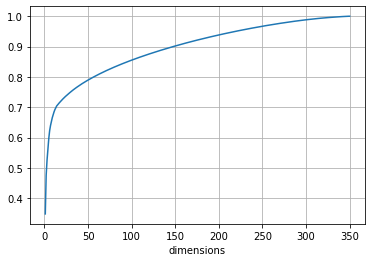

In [50]:
# Importance of each dimension
dimensions_ratio1.cumsum().plot(grid=True)

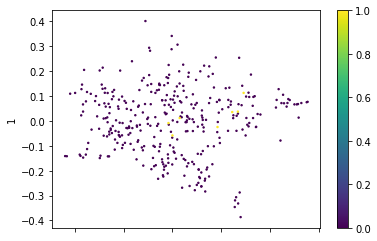

In [51]:
# Plotting the two most important dimensions against each other
import matplotlib.pyplot as plt

show1 = pd.DataFrame(embedding1.transform(kmer27Table01))
show1.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)

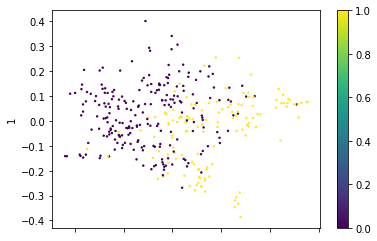

In [52]:
# kmeans (try4) clustering
show1.plot.scatter(x=0, y=1, style="o", c=y_hat4, cmap = "viridis", s=2)

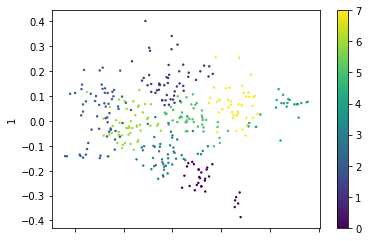

In [53]:
# kmeans (try5) clustering
show1.plot.scatter(x=0, y=1, style="o", c=y_hat6, cmap = "viridis", s=2)

#### PCA (try 2) best!

In [54]:
embedding2 = PCA()
# only use columns that confirmed virus killers have no zeros in for kmer length 7
cols = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True].columns
embedding2.fit(kmer7Table01[cols])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
dimensions2 = pd.Index(range(1,embedding2.n_components_ + 1), name="dimensions")
dimensions_ratio2 = pd.Series(embedding2.explained_variance_ratio_, index=dimensions2)
dimensions_ratio2.head()

dimensions
1    0.147604
2    0.067802
3    0.052073
4    0.049220
5    0.043775
dtype: float64

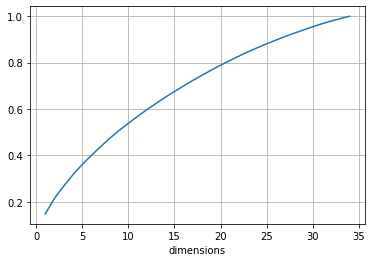

In [56]:
# Importance of each dimension
dimensions_ratio2.cumsum().plot(grid=True)

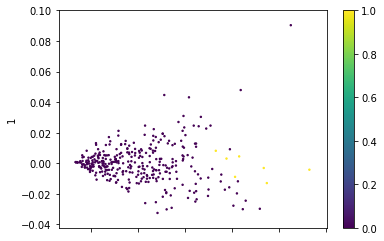

In [57]:
# Plotting the two most important dimensions against each other
import matplotlib.pyplot as plt

# Confirmed labels
show2 = pd.DataFrame(embedding2.transform(kmer7Table01[cols]))
show2.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)

Text(0, 0.5, 'Second Principal Component')

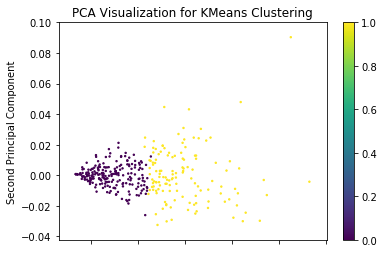

In [58]:
# kmeans clustering
show2.plot.scatter(x=0, y=1, style="o", c=y_hat4, cmap = "viridis", s=2)
plt.title('PCA Visualization for KMeans Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.savefig('foo.png', bbox_inches='tight')

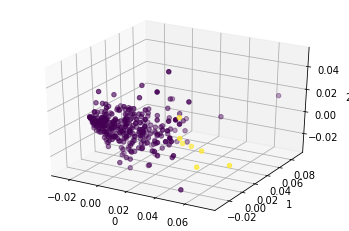

In [59]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure().gca(projection='3d')
ax.scatter(show2[0], show2[1], show2[2], c=labels, cmap='viridis')
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')
plt.show()

Text(0, 0.5, 'Second Principal Component')

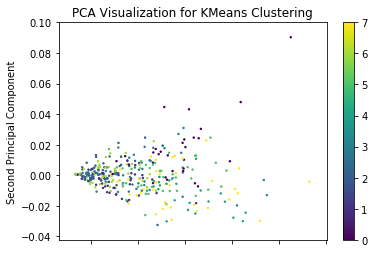

In [60]:
# kmeans clustering
show2.plot.scatter(x=0, y=1, style="o", c=y_hat6, cmap = "viridis", s=2)
plt.title('PCA Visualization for KMeans Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.savefig('foo.png', bbox_inches='tight')

#### **tSNE**

#### tSNE (try 1)

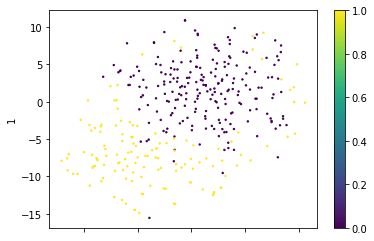

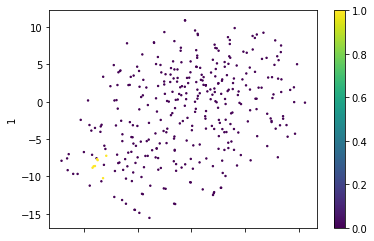

In [61]:
from sklearn.manifold import TSNE
tSNEembedding = TSNE(n_components=2, random_state = 0)
tSNEembedding_low = tSNEembedding.fit_transform(kmer7Table01[cols])

tSNEshow = pd.DataFrame(tSNEembedding_low)
tSNEshow.plot.scatter(x=0, y=1, style="o", c=y_hat4, cmap = "viridis", s=2)
tSNEshow.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)

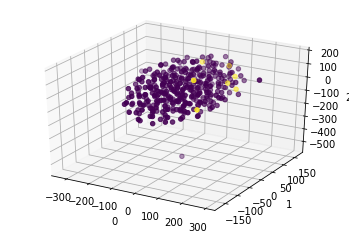

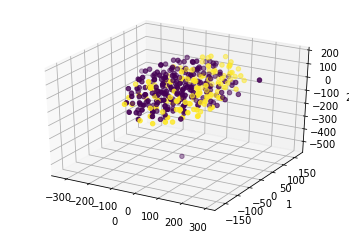

In [62]:
tSNEembedding = TSNE(n_components=3, random_state = 0)
tSNEembedding_low = tSNEembedding.fit_transform(kmer7Table01[cols])

tSNEshow = pd.DataFrame(tSNEembedding_low)

ax = plt.figure().gca(projection='3d')
ax.scatter(tSNEshow[0], tSNEshow[1], tSNEshow[2], c=labels, cmap='viridis')
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')
plt.show()

ax = plt.figure().gca(projection='3d')
ax.scatter(tSNEshow[0], tSNEshow[1], tSNEshow[2], c=y_hat4, cmap='viridis')
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')
plt.show()

#### **Spectral Clustering**

#### Spectral Clustering with PCA (try 2)

In [63]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2, random_state=0).fit(show2)

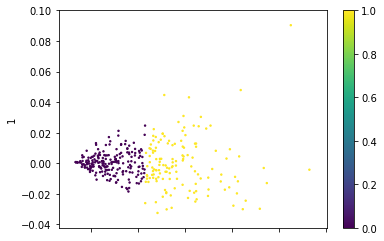

In [64]:
# Clustering labels
show2.plot.scatter(x=0, y=1, style="o", c=clustering.labels_, cmap = "viridis", s=2)

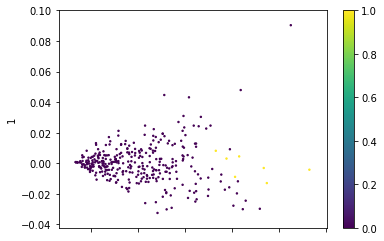

In [65]:
# Confirmed labels
show2.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)

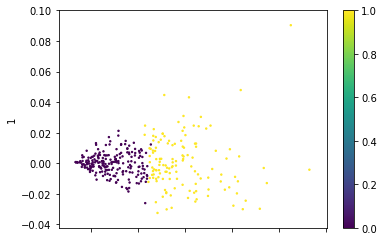

In [66]:
# Kmeans clustering
show2.plot.scatter(x=0, y=1, style="o", c=y_hat4, cmap = "viridis", s=2)

#### **Mean Shift**
Trying to eliminate effect of common clusters. Lot's of work still needed, but if common kmers can be removed to better illustrate feature importance, clusterng methods will work alot better.

#### Mean Shift (try 1)

In [67]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(show1)
cluster_centers = ms.cluster_centers_

Text(0, 0.5, '1')

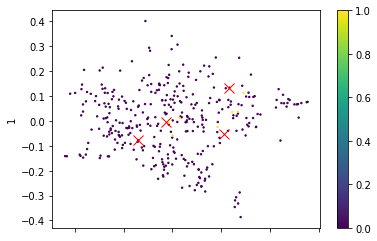

In [68]:
ax = show1.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=100, linewidth=1)
ax.set_xlabel('0')
ax.set_ylabel('1')

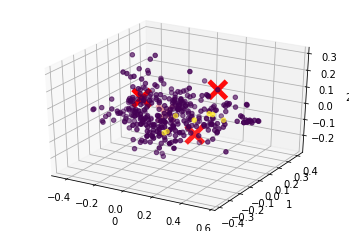

In [69]:
ax = plt.figure().gca(projection='3d')
ax.scatter(show1[0], show1[1], show1[2], c=labels, cmap='viridis')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')
plt.show()

#### Mean Shift (try 2)

In [70]:
ms = MeanShift()
ms.fit(show2)
cluster_centers = ms.cluster_centers_

Text(0, 0.5, '1')

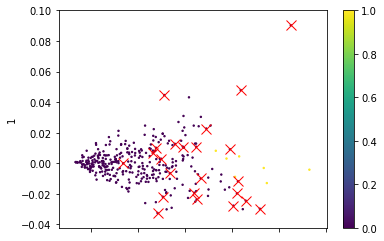

In [71]:
ax = show2.plot.scatter(x=0, y=1, style="o", c=labels, cmap = "viridis", s=2)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=100, linewidth=1)
ax.set_xlabel('0')
ax.set_ylabel('1')

In [72]:
ms = MeanShift()
ms.fit(kmer7Table01[cols4])
cluster_centers = ms.cluster_centers_
cluster_centers[0]

array([0.00500029, 0.00283078, 0.00387404, 0.00270907, 0.00296418,
       0.00541534, 0.00356917, 0.00290208, 0.00387834, 0.00381071,
       0.00370791, 0.00355257, 0.00309258, 0.00313879, 0.00328262,
       0.00304122, 0.00436592, 0.00326359, 0.00322572, 0.00280265,
       0.0033803 , 0.00350289, 0.00460773, 0.00474789, 0.00444827,
       0.0029092 , 0.00314505, 0.00361447, 0.00345367, 0.00382174,
       0.0043725 , 0.00446568, 0.00378362, 0.00425733])

In [73]:
ms = MeanShift()
ms.fit(show2)
cluster_centers = ms.cluster_centers_
print(cluster_centers[0])
cluster_centers = embedding2.inverse_transform(ms.cluster_centers_)
print(cluster_centers[0])

[-6.33924876e-03 -1.00660991e-05  9.23686174e-05 -1.67547532e-04
 -6.90636985e-04 -9.41128597e-05 -1.02606960e-04  9.92680258e-05
 -1.35514555e-04  1.85166457e-05 -5.47522679e-05 -2.63955517e-04
 -7.06849332e-05  1.42731236e-04  6.06862628e-05 -2.74002400e-04
  5.80646268e-05 -1.26668626e-04 -9.87505338e-08  7.10144658e-06
  1.53330492e-04 -2.72118508e-04 -2.59313338e-04  9.44052728e-06
 -1.29156914e-04 -4.41844136e-05 -4.14355005e-05  2.87829938e-04
  2.97666027e-04  1.00467614e-04  1.51203633e-05 -1.63631720e-04
  3.89414763e-05 -1.25345044e-04]
[0.00500029 0.00283078 0.00387404 0.00270907 0.00296418 0.00541534
 0.00356917 0.00290208 0.00387834 0.00381071 0.00370791 0.00355257
 0.00309258 0.00313879 0.00328262 0.00304122 0.00436592 0.00326359
 0.00322572 0.00280265 0.0033803  0.00350289 0.00460773 0.00474789
 0.00444827 0.0029092  0.00314505 0.00361447 0.00345367 0.00382174
 0.0043725  0.00446568 0.00378362 0.00425733]


## Tf instead of T
-----

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
def kmerXTabletf(s, a, b):
    tf_vector = CountVectorizer(analyzer='char', ngram_range=(a,b))
    s_hat = tf_vector.fit_transform(s.Sequence)
    kmerNames = tf_vector.get_feature_names()
    kmers = s_hat.toarray()
    df = pd.DataFrame(kmers,columns=kmerNames, index = s.index)
    return df.div(df.apply(sum, axis=1), axis=0)

In [75]:
test = kmerXTabletf(virus1, 7, 7)
test.head()

,aaaaaaa,aaaaaac,aaaaaag,aaaaaat,aaaaaca,aaaaacc,aaaaacg,aaaaact,aaaaaga,aaaaagc,...,tttttck,tttttct,tttttga,tttttgc,tttttgg,tttttgt,tttttta,ttttttc,ttttttg,ttttttt
ID,,,,,,,,,,,,,,,,,,,,,
NC_007415.1,0.008236,0.000000,0.0,0.000000,0.000000,0.000183,0.000183,0.000366,0.000000,0.000000,...,0.0,0.000000,0.000366,0.000366,0.000000,0.000183,0.000000,0.000183,0.000366,0.000366
NC_015939.1,0.003451,0.000096,0.0,0.000192,0.000096,0.000000,0.000000,0.000192,0.000096,0.000000,...,0.0,0.000096,0.000000,0.000000,0.000192,0.000192,0.000096,0.000000,0.000000,0.000000
NC_022896.1,0.001715,0.000000,0.0,0.000000,0.000000,0.000137,0.000069,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000206,0.000137,0.000069,0.000000,0.000069,0.000000
NC_026510.1,0.000000,0.000000,0.0,0.000000,0.000396,0.000000,0.000000,0.000000,0.000396,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NC_027138.1,0.000000,0.000000,0.0,0.000000,0.000155,0.000155,0.000000,0.000155,0.000000,0.000155,...,0.0,0.000000,0.000155,0.000155,0.000000,0.000000,0.000000,0.000155,0.000000,0.000000


## Feature Selection
-----

In [76]:
# columns that contain no zeros
columnNonZero = kmer7Table1.loc[:, (kmer7Table1 == 0).any(axis=0) != True].columns
columnNonZero

Index(['aaaacaa', 'aactttt', 'aagatga', 'aatcaaa', 'acaaata', 'agaagaa',
       'agatttc', 'aggaatt', 'aggagat', 'aggttga', 'atgtctg', 'atttgat',
       'caaaaac', 'caatata', 'caatttg', 'ccaaaaa', 'cttcaac', 'gaagata',
       'gaattcc', 'gagctga', 'gaggaat', 'ggaagat', 'gttgaag', 'tcaagaa',
       'tcaagga', 'tcacaag', 'tcttgga', 'tggaaag', 'tggaatt', 'ttcaaag',
       'ttctttc', 'ttgaaga', 'ttggaaa', 'ttttgat'],
      dtype='object')

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = kmer7Table01
y = y_hat4 # uses predicted labels from kmeans try4

SKB = SelectKBest(score_func=chi2, k=10)
SKB.fit(X,y)

featureImportances1 = pd.DataFrame(SKB.scores_, columns = ["Score"], index = X.columns)
featureImportances1 = featureImportances1.sort_values(by="Score", ascending=False)
featureImportances1.head(n=10)

,Score
ttaaaga,1.536276
agaagaa,1.504210
taataaa,1.411589
taaagat,1.339720
aaagaaa,1.285408
gaaatta,1.180777
aaattat,1.180394
tttaaaa,1.175981
aagaaaa,1.152155
aagatga,1.135863


In [78]:
total = 0
for kmer in columnNonZero:
    if kmer in list(featureImportances1.index[0:34]):
        total += 1
total

5

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

X = kmer7Table01
y = y_hat4 # uses predicted labels from kmeans try4

ETC = ExtraTreesClassifier(random_state = 0)
ETC.fit(X,y)
 
featureImportances2 = pd.DataFrame(ETC.feature_importances_, index=X.columns, columns=["Score"])
featureImportances2 = featureImportances2.sort_values(by="Score", ascending=False)
featureImportances2.head(n=10)

,Score
aagatga,0.004914
aagaaag,0.003889
cacaaga,0.003333
agaagaa,0.003235
aaagatg,0.002843
agaagat,0.002782
aaatgga,0.002680
tgagaaa,0.002618
ttaataa,0.002567
aattaat,0.002489


In [80]:
total = 0
for kmer in columnNonZero:
    if kmer in list(featureImportances2.index[0:11]):
        total += 1
total

2

## Scratch Space

In [81]:
virus01["Labels"] = y_hat4

In [82]:
virus01[343:]

,Sequence,Labels
ID,,
NC_007415.1,CTTTAGTAAATACCACCGCCTCTTAATAAGTCTCGAGGCACTCCCC...,1
NC_015939.1,GGGGTGATGGGAAACTTACGTTTCGCCAACGTTAAGGTACTGTGAT...,1
NC_022896.1,TTTTTGGGGATGGTACTCTCAGGTTTGATCTTTGTAGATCCTAACT...,1
NC_026510.1,TTGGCTCCTGGAGACCGTTAGGTCCCCAGAAGCGGTTCAATAGAAC...,1
NC_027138.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...,1
NC_027139.1,GCAATAAAAAGCACAGCCGGAAGGCTTTCTTTTTATTGCCCAGTTT...,1
NC_025383.1,AGGGAGTATTATAATTACCTTCGTAGTTGTTCTTACTCTCTGGTAC...,1


In [83]:
len(virus01)

350

In [84]:
import matplotlib.pyplot as plt
import matplotlib.colors

In [85]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red"])

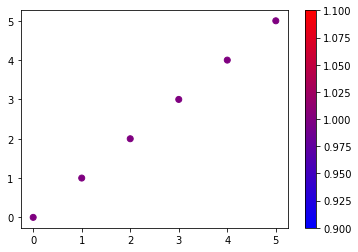

In [86]:
a = [0,1,2,3,4,5]
b = [0,1,2,3,4,5]
label = [1,1,1,1,1,1]

plt.scatter(a,b,c=label, cmap=cmap)
plt.colorbar()
plt.show()

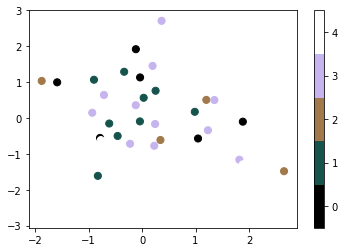

In [87]:
# taken from https://gist.github.com/jakevdp/91077b0cae40f8f8244a

import numpy as np

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


if __name__ == '__main__':
    N = 5

    x = np.random.randn(40)
    y = np.random.randn(40)
    c = np.random.randint(N, size=40)

    # Edit: don't use the default ('jet') because it makes @mwaskom mad...
    plt.scatter(x, y, c=c, s=50, cmap=discrete_cmap(N, 'cubehelix'))
    plt.colorbar(ticks=range(N))
    plt.clim(-0.5, N - 0.5)
    plt.show()

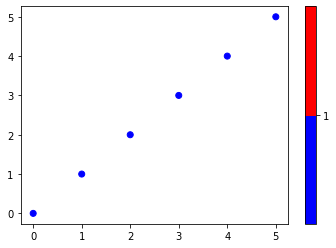

In [88]:
N = 2


plt.scatter(a,b,c=label, cmap=discrete_cmap(N, cmap))
plt.colorbar(ticks=range(N))
plt.show()

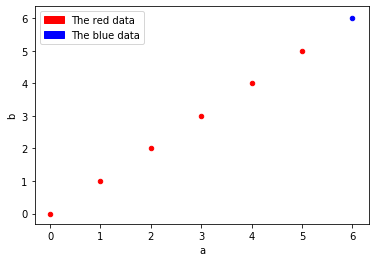

In [89]:
a = [0,1,2,3,4,5,6]
b = [0,1,2,3,4,5,6]
label = [1,1,1,1,1,1,0]

df = pd.DataFrame()
df["a"] = a
df["b"] = b
df["label"] = label

ax = df[df["label"] == 1].plot.scatter("a", "b", color="red")
df[df["label"] == 0].plot.scatter("a", "b", color="blue", ax=ax)
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='The red data')
blue_patch = mpatches.Patch(color='blue', label='The blue data')
plt.legend(handles=[red_patch, blue_patch])
